# EDA

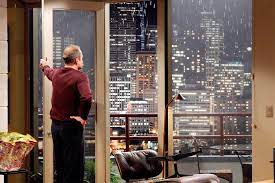

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

I first want to take a quick look into the data. I joined both tables that are available.

In [2]:
# Importing the csv data
df_original = pd.read_csv('data/eda.csv')

In [3]:
# Now I check the high level data
df_original.head(10)

,date,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,1,7129300520,3.000,1.000,1180.000,5650.000,1.000,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,2,6414100192,3.000,2.250,2570.000,7242.000,2.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,3,5631500400,2.000,1.000,770.000,10000.000,1.000,...,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4,2487200875,4.000,3.000,1960.000,5000.000,1.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,5,1954400510,3.000,2.000,1680.000,8080.000,1.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000
5,2014-05-12,1230000.000,7237550310,6,7237550310,4.000,4.500,5420.000,101930.000,1.000,...,11,3890.000,1530.000,2001,0.000,98053,47.656,-122.005,4760.000,101930.000
6,2014-06-27,257500.000,1321400060,7,1321400060,3.000,2.250,1715.000,6819.000,2.000,...,7,1715.000,NaN,1995,0.000,98003,47.310,-122.327,2238.000,6819.000
7,2015-01-15,291850.000,2008000270,8,2008000270,3.000,1.500,1060.000,9711.000,1.000,...,7,1060.000,0.000,1963,0.000,98198,47.410,-122.315,1650.000,9711.000
8,2015-04-15,229500.000,2414600126,9,2414600126,3.000,1.000,1780.000,7470.000,1.000,...,7,1050.000,730.000,1960,0.000,98146,47.512,-122.337,1780.000,8113.000
9,2015-03-12,323000.000,3793500160,10,3793500160,3.000,2.500,1890.000,6560.000,2.000,...,7,1890.000,0.000,2003,0.000,98038,47.368,-122.031,2390.000,7570.000


In [4]:
df_original.columns

Index(['date', 'price', 'house_id', 'id', 'id.1', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
#Dropping column id1 which is the column the csv was joined on, and which is duplicate of house_id
df_work = df_original.drop(columns=["id.1"], inplace = True)

In [6]:
df_work = df_original.sort_values('date')

In [7]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21597 entries, 7316 to 16580
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   bedrooms       21597 non-null  float64
 5   bathrooms      21597 non-null  float64
 6   sqft_living    21597 non-null  float64
 7   sqft_lot       21597 non-null  float64
 8   floors         21597 non-null  float64
 9   waterfront     19206 non-null  float64
 10  view           21534 non-null  float64
 11  condition      21597 non-null  int64  
 12  grade          21597 non-null  int64  
 13  sqft_above     21597 non-null  float64
 14  sqft_basement  21145 non-null  float64
 15  yr_built       21597 non-null  int64  
 16  yr_renovated   17749 non-null  float64
 17  zipcode        21597 non-null  int64  
 18  lat     

In [8]:
# Setting a list of the zip codes that are considered as central Seattle
central_zip_codes = ['98101', '98102', '98103', '98104', '98105', '98106', '98107',
                     '98108', '98109', '98112', '98115', '98116', '98117', '98118',
                     '98119', '98121', '98122', '98125', '98126', '98133', '98134',
                     '98136', '98144', '98146', '98148', '98154', '98155', '98158',
                     '98164', '98166', '98168', '98174', '98177', '98178', '98188',
                     '98195', '98198', '98199']

In [11]:
# of houses SOLD per zip code
df_zip_code_group = df_work.groupby('zipcode').count()
df_zip_code_group

,date,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
zipcode,,,,,,,,,,,,,,,,,,,,,
98001,361,361,361,361,361,361,361,361,361,328,...,361,361,361,353,361,284,361,361,361,361
98002,199,199,199,199,199,199,199,199,199,179,...,199,199,199,198,199,164,199,199,199,199
98003,280,280,280,280,280,280,280,280,280,255,...,280,280,280,273,280,240,280,280,280,280
98004,317,317,317,317,317,317,317,317,317,283,...,317,317,317,315,317,263,317,317,317,317
98005,168,168,168,168,168,168,168,168,168,158,...,168,168,168,167,168,138,168,168,168,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98177,255,255,255,255,255,255,255,255,255,234,...,255,255,255,252,255,204,255,255,255,255
98178,262,262,262,262,262,262,262,262,262,233,...,262,262,262,258,262,210,262,262,262,262
98188,136,136,136,136,136,136,136,136,136,119,...,136,136,136,131,136,111,136,136,136,136


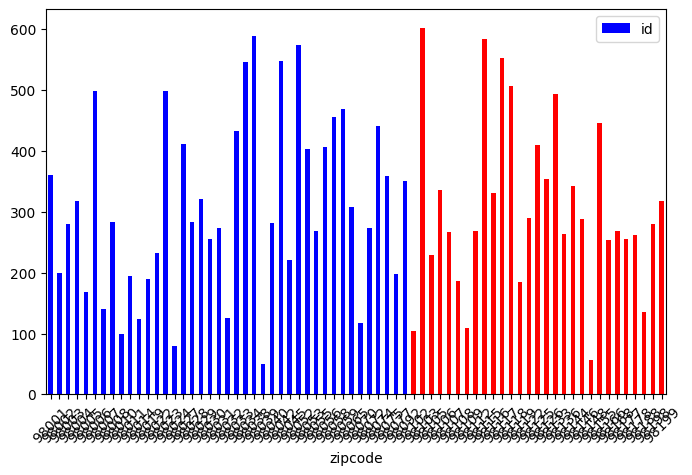

In [13]:
# Plotting the number of houses SOLD per zip code
zip_code_plot = df_zip_code_group.plot(kind = "bar", y = 'id', rot = 45, color = colors)

In [12]:
colors = ['red' if str(zip_code) in central_zip_codes else 'blue' for zip_code in df_zip_code_group.index]
#colors

In [14]:
# Now taking a more precise look into the waterfront houses
# First checking what data we have for waterfronthouses
df_work.groupby('waterfront', dropna = False).count()

,date,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
waterfront,,,,,,,,,,,,,,,,,,,,,
0.000,19060,19060,19060,19060,19060,19060,19060,19060,19060,19004,...,19060,19060,18649,19060,15671,19060,19060,19060,19060,19060
1.000,146,146,146,146,146,146,146,146,146,145,...,146,146,142,146,121,146,146,146,146,146
NaN,2391,2391,2391,2391,2391,2391,2391,2391,2391,2385,...,2391,2391,2354,2391,1957,2391,2391,2391,2391,2391


<Axes: xlabel='zipcode'>

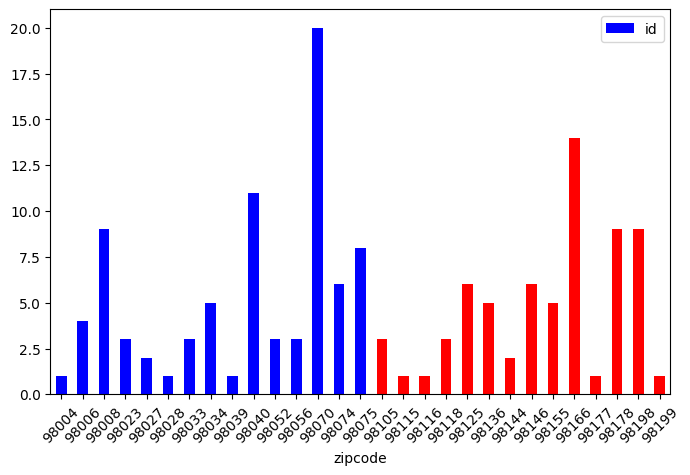

In [16]:
# Now we want to see how they are by zip code
df_waterfront_zipcode = df_work[df_work['waterfront'] == 1].groupby(['zipcode'], dropna = False).count()
colors = ['red' if str(zip_code) in central_zip_codes else 'blue' for zip_code in df_waterfront_zipcode.index]
df_waterfront_zipcode.plot(kind = "bar", y = 'id', rot = 45, color = colors)

In [1]:
# It turns out there are very waterfront house sales. Let's take a more precise look how they are scattered

In [16]:
import folium
import pandas as pd

# Read the CSV file
#data = pd.read_csv('locations.csv')
df_waterfront = df_work[df_work['waterfront'] == 1]

# Create a map centered around the average latitude and longitude
center_lat = df_waterfront['lat'].mean()
center_lon = df_waterfront['long'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add markers to the map
for _, row in df_waterfront.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=row['house_id']
    ).add_to(m)

# Save the map to an HTML file
m.save("csv_map.html")

# Display the map in a Jupyter notebook (optional)
#m

In [19]:

# Read the CSV file
#data = pd.read_csv('locations.csv')
df_unknown = df_work[df_work['waterfront'].isna()]

# Create a map centered around the average latitude and longitude
center_lat = df_unknown['lat'].mean()
center_lon = df_unknown['long'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add markers to the map
for _, row in df_unknown.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=row['house_id']
    ).add_to(m)

# Save the map to an HTML file
m.save("csv_map_unknown.html")


In [ ]:
# TBD : what do I do with the information? Do I use a geopandas library or something similar?

In [20]:
# Now checking the average price of waterfront and non waterfront houses

SyntaxError: invalid syntax (955276913.py, line 1)

In [ ]:
S